# Problema 2
Utilizando las siguientes funciones/paquetes resolver los siguientes problemas de clasificación en problema_2.py:

genfromtxt de numpy para leer los dos datasets:

./datasets/student_admission.txt
./datasets/chip_tests.txt
train_test_split de sklearn para dividir entre test set y train set. Recomendamos un 40% de datos para test set

GaussianNB de sklearn como modelo de ML.

Y la función plot_boundaries(X_train, X_test, y_train, y_test, score, predict_proba, ax=ax, h=h) incluida en problema_2.py para graficar los resultados. X_train es un np.array con los features de entrada, y_train es la etiqueta. Lo mismo con X_test e y_test, Score es el 'accuracy' del modelo, predict_proba es la función que dada una entrada de la probabilidad de clasificar correcto y h es el paso para la grafica del 'boundary'

0.9


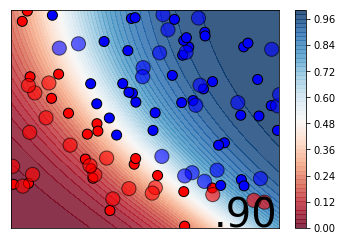

In [98]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

def plot_boundaries(X_train, X_test, y_train, y_test, score, probability_func, h = .02, ax = None):
    X = np.vstack((X_test, X_train))
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    if ax is None:
        ax = plt.subplot(1, 1, 1)
    
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    
    Z = probability_func(np.c_[xx.ravel(), yy.ravel()])[:, 1]

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    
    cf = ax.contourf(xx, yy, Z, 50, cmap=cm, alpha=.8)
    plt.colorbar(cf, ax=ax)
    #plt.colorbar(Z,ax=ax)

    # Plot also the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k', s=100)
    # and testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
               edgecolors='k', alpha=0.6, s=200)

    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
            size=40, horizontalalignment='right')
    
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

def train_and_plot(X, y, h=1):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=4)
    gnb = GaussianNB()
    y_pred = gnb.fit(X_train, y_train)
    #print(gnb.score(X_train,y_train))
    score = gnb.score(X_test,y_test)
    print(score)
    
    plot_boundaries(X_train, X_test, y_train, y_test, score, gnb.predict_proba, h)
    
    #print(y_pred.predict(X_test))
    #print(y_pred.predict_proba(X_test))
    return


def get_data_train_and_plot(data_path):
    dictionary= np.genfromtxt(data_path, delimiter=",")
    #print(dictionary.shape)
    features=dictionary[:,(0,1)]
    #print(features)
    labels=dictionary[:,2]
    #print(labels)
    train_and_plot(features, labels)

get_data_train_and_plot("./student_admission.txt")
#get_data_train_and_plot("./chip_tests.txt")



